Importing required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading the file with name 'fifa 2018 stats.csv'
And Printing the dataframe


In [ ]:
df=pd.read_csv('fifa 2018 stats.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Getting the rows and columns of the dataframe

In [ ]:
print(df.shape)

(128, 27)


First I want to find if there are any NaN values in my dataframe.
If the columns are not null I would get False.
If there is any null values in columns I would get True.

In [ ]:
print(df.columns)
print(type(df['Date']))
print(type(df['Own goal Time']))

k=df.isnull().any()
k

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Date                      False
Team                      False
Opponent                  False
Goal Scored               False
Ball Possession %         False
Attempts                  False
On-Target                 False
Off-Target                False
Blocked                   False
Corners                   False
Offsides                  False
Free Kicks                False
Saves                     False
Pass Accuracy %           False
Passes                    False
Distance Covered (Kms)    False
Fouls Committed           False
Yellow Card               False
Yellow & Red              False
Red                       False
Man of the Match          False
1st Goal                   True
Round                     False
PSO                       False
Goals in PSO              False
Own goals                  True
Own goal Time              True
dtype: bool

Finding out which columns are having any null values


In [ ]:
col_with_null_values=df.columns[k]
print(col_with_null_values)


Index(['1st Goal', 'Own goals', 'Own goal Time'], dtype='object')


We got 3 columns which are having null values. So we need to fill the null values if it is possible to fill those values. For Own Goals, if the data is not mentioned I can change them to zero. Because there will be no own goals if not mentioned. But for '1st Goal' and 'Own Goal time' we can't change them. Because if there are no goals or no own goals then there is no point of time included. So they can be null values.

In [ ]:
#changing only own goals and leaving 1st goal and own goal time to be null
df.fillna({
    'Own goals':0
},inplace=True)
df.isnull().any()

Date                      False
Team                      False
Opponent                  False
Goal Scored               False
Ball Possession %         False
Attempts                  False
On-Target                 False
Off-Target                False
Blocked                   False
Corners                   False
Offsides                  False
Free Kicks                False
Saves                     False
Pass Accuracy %           False
Passes                    False
Distance Covered (Kms)    False
Fouls Committed           False
Yellow Card               False
Yellow & Red              False
Red                       False
Man of the Match          False
1st Goal                   True
Round                     False
PSO                       False
Goals in PSO              False
Own goals                 False
Own goal Time              True
dtype: bool

In [ ]:
#checking if I got the expected output
df.columns[df.isnull().any()]

Index(['1st Goal', 'Own goal Time'], dtype='object')

I want to view totol teams participated in the tournament. So I am grouping them them with respect to their teams.

In [ ]:
g1=df.groupby('Team')
for key,value in g1:
  print(key)
  print(value)


Argentina
          Date       Team Opponent  ...  Goals in PSO  Own goals  Own goal Time
10  16-06-2018  Argentina  Iceland  ...             0        0.0            NaN
44  21-06-2018  Argentina  Croatia  ...             0        0.0            NaN
77  26-06-2018  Argentina  Nigeria  ...             0        0.0            NaN
97  30-06-2018  Argentina   France  ...             0        0.0            NaN

[4 rows x 27 columns]
Australia
          Date       Team Opponent  ...  Goals in PSO  Own goals  Own goal Time
9   16-06-2018  Australia   France  ...             0        1.0           81.0
41  21-06-2018  Australia  Denmark  ...             0        0.0            NaN
74  26-06-2018  Australia     Peru  ...             0        0.0            NaN

[3 rows x 27 columns]
Belgium
           Date     Team Opponent  ...  Goals in PSO  Own goals  Own goal Time
24   18-06-2018  Belgium   Panama  ...             0        0.0            NaN
52   23-06-2018  Belgium  Tunisia  ...          

I  want to see the performance of the teams. So I am trying to see the Ball Possession values. Who actually had the ball for more time. I also want to know which teams had ball for more time and which team had ball for less time.


We can see that Spain has the ball for more time. It has almost 68.5 percent average in ball Possession. So this is almost (68.5 percent of 90 min) 61.65 min in each game.

In [ ]:
new_df=g1.mean()
new_df.reset_index(inplace=True)
# print(new_df.head())
print(new_df.shape)
print(new_df['Ball Possession %'].max())

new_df['Team'][new_df['Ball Possession %']==new_df['Ball Possession %'].max()]


(32, 22)
68.5


27    Spain
Name: Team, dtype: object

We can see that Iran has the ball for least time. It has almost 32.66 percent average in ball Possession. So this is almost (32.66 percent of 90 min) 29 min in each game.

In [ ]:
print(new_df['Ball Possession %'].min())
new_df['Team'][new_df['Ball Possession %']==new_df['Ball Possession %'].min()]


32.666666666666664


13    Iran
Name: Team, dtype: object

We have see the ball possesion values. But how is it possible for Spain to have the ball for more time and Iran has it for lease time. Is there any link to this?

To answer the above question we need to think about pass accuracy. Yes definitely there is a link to pass accuracy and ball possesion. So let us see which teams have more pass accuracy percentage. 

In [ ]:
print(new_df['Pass Accuracy %'].max())
new_df['Team'][new_df['Pass Accuracy %']==new_df['Pass Accuracy %'].max()]

91.0


27    Spain
Name: Team, dtype: object

We can see that Spain has most pass accuracy percentage. So that is the reason why they were able to get the ball for more time. 

In [ ]:
print(new_df['Pass Accuracy %'].min())
new_df['Team'][new_df['Pass Accuracy %']==new_df['Pass Accuracy %'].min()]

71.66666666666667


12    Iceland
Name: Team, dtype: object

We can see that Iceland is the team with less pass percentage. But we found that Iran has least ball posession value. So let us see how these three teams vary in terms of ball possession and pass accuracy.

In [ ]:
new_df[new_df['Team']=='Iceland']


,Team,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
12,Iceland,0.666667,37.0,12.0,4.0,6.333333,1.666667,5.666667,0.333333,10.666667,3.0,71.666667,268.0,104.666667,11.666667,1.0,0.0,0.0,49.5,0.0,0.0,NaN


In [ ]:
new_df[new_df['Team']=='Iran']

,Team,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
13,Iran,0.666667,32.666667,7.0,1.333333,5.0,0.666667,1.666667,1.0,16.333333,2.333333,74.666667,213.0,99.666667,14.666667,2.333333,0.0,0.0,90.0,0.0,0.0,NaN


In [ ]:
print(type(new_df.loc[[12,13],:]))
new_df.loc[[27,12,13],:][['Team','Ball Possession %','Pass Accuracy %']]

<class 'pandas.core.frame.DataFrame'>


,Team,Ball Possession %,Pass Accuracy %
27,Spain,68.500000,91.000000
12,Iceland,37.000000,71.666667
13,Iran,32.666667,74.666667


Here we have seen that Iceland and Iran are having less Ball possession and pass accuracy values and they only vary a litte. Spain has more pass accuracy so they were having more ball possession value


Now after ball possession and pass accuracy let us now calculate how teams have performed. Let us see whether they were on target when they hit the ball. 
So I want to add one more column to my dataframe to check about the percentage of teams regarding the on target and attempts

In [ ]:
new_df=df
k=(new_df['On-Target']/new_df['Attempts'])*100
print(k)
print(type(k))
new_df['On target %']=k
new_df.head()

0      53.846154
1       0.000000
2      37.500000
3      28.571429
4      23.076923
         ...    
123     9.090909
124    33.333333
125    33.333333
126    75.000000
127    20.000000
Length: 128, dtype: float64
<class 'pandas.core.series.Series'>


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,On target %
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,0.0,NaN,53.846154
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,0.0,NaN,0.000000
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,0.0,NaN,37.500000
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,0.0,NaN,28.571429
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0,23.076923


So for analysis of on target percentage I would try to group my dataset in terms of team

In [ ]:
g1=new_df.groupby('Team')
new_df=g1.mean()
new_df.reset_index(inplace=True)
new_df.columns


Index(['Team', 'Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time', 'On target %'],
      dtype='object')

We can see that there is an extra column 'On target %' added to the dataframe at the end. Now we shall see the teams which performed better while hitting the target

In [ ]:
new_df['Team'][new_df['On target %']==new_df['On target %'].max()]


20    Peru
Name: Team, dtype: object

Peru was able to hit the target more perfectly than other teams.
Let us see the how accurate they were.

In [ ]:
new_df['On target %'][new_df['Team']=='Peru']

20    42.777778
Name: On target %, dtype: float64

Their percentage turned out to be 42.77% which is actually a pretty good percentage. Because apart from this there would also be blockage. 

I would also want to check the on target percentage of spain

In [ ]:
# this turned out to be 30 %
new_df['On target %'][new_df['Team']=='Spain']

27    30.078431
Name: On target %, dtype: float64

Now which team was having less percentage in terms of on target

In [ ]:
new_df['Team'][new_df['On target %']==new_df['On target %'].min()]


13    Iran
Name: Team, dtype: object

Iran has less percentage of 16%. So they need to work hard in hitting the ball right on to target. When they are not able to hit the ball right on to target then there is not use of ball possession and ball passing. Because at the end they should be able to hit the ball at the target. 

In [ ]:
new_df['On target %'][new_df['Team']=='Iran']

13    16.666667
Name: On target %, dtype: float64

Apart from these percentages, we also can see the data in terms of numbers.
Here we can see the dataframe which has columns like fouls committed,goals scored etc. 

In [ ]:
new_df=g1.sum()
print(new_df.columns)
new_df=new_df[['Goal Scored', 'Saves',
       'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red']]
new_df.reset_index(inplace=True)
new_df

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time', 'On target %'],
      dtype='object')


,Team,Goal Scored,Saves,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,Argentina,6,6,2335,399,55,11,0,0
1,Australia,2,10,1465,330,37,7,0,0
2,Belgium,16,27,3698,735,99,11,0,0
3,Brazil,8,5,2839,509,50,7,0,0
4,Colombia,6,10,1813,437,63,9,0,1
5,Costa Rica,2,10,1047,319,43,6,0,0
6,Croatia,14,20,3906,823,114,15,0,0
7,Denmark,3,21,1644,463,54,6,0,0
8,Egypt,2,9,1190,328,38,5,0,0
9,England,12,17,3842,824,72,8,0,0


I want to see the team which scored more number of goals in the toal tournament.

In [ ]:
print(new_df['Team'][new_df['Goal Scored']==new_df['Goal Scored'].max()])
print(new_df['Goal Scored'].max())

2    Belgium
Name: Team, dtype: object
16


Belgium scored the most number of goals in the total tournament. Let us also see which team scored least number of goals

In [ ]:
print(new_df['Team'][new_df['Goal Scored']==new_df['Goal Scored'].min()])
print(new_df['Goal Scored'].min())

1        Australia
5       Costa Rica
8            Egypt
11         Germany
12         Iceland
13            Iran
17         Morocco
19          Panama
20            Peru
21          Poland
24    Saudi Arabia
26          Serbia
Name: Team, dtype: object
2


There are many teams which scored only 2 goals in total tournament. Here is the list of the teams. [Australia
     ,  Costa Rica
,          Egypt
      ,   Germany
       ,  Iceland
        ,    Iran
         ,Morocco
          ,Panama
           , Peru
 ,         Poland
  ,Saudi Arabia
  ,        Serbia]
These teams scored 2 goals in the total tournment.


Now let us see the stats os most important match of the tournament i.e Final match. 

In [ ]:
g1=df.groupby('Round')
new_df=g1.get_group('Final')
new_df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,On target %
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0,75.0
127,15-07-2018,Croatia,France,2,61,15,3,8,4,6,1,15,3,83,547,100,13,1,0,0,No,28.0,Final,No,0,0.0,NaN,20.0


The index is not good looking. So I am replacing it with normal values. 

In [ ]:
new_df.set_index(keys=np.arange(2),inplace=True)
new_df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,On target %
0,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0,75.0
1,15-07-2018,Croatia,France,2,61,15,3,8,4,6,1,15,3,83,547,100,13,1,0,0,No,28.0,Final,No,0,0.0,NaN,20.0


Now the dataframe is good to see. 
Let us find the winner of the tournament. But how to find the winner. We need to check who made more goals. But I want to first confirm that there was no PSO in the final match. So I am seeing the PSO of final match

In [ ]:
#pso penalty shoot out
new_df['PSO']

0    No
1    No
Name: PSO, dtype: object

Here we have seen that there was no penalty shoot out in the match. This indicated that the number of goals scored by the teams is not equal. So I can find the winner by identifying the team which scored most number of goals.

In [ ]:
new_df['Team'][new_df['Goal Scored']==new_df['Goal Scored'].max()]

0    France
Name: Team, dtype: object

# Hurray!! We have found that France has scored more number of goals and they won the finale. So the winners of the tournament are  **France**

Now let us find which teams has more fouls committed in the complete tournament.

In [ ]:
g1=df.groupby('Team')
new_df=g1.sum()
print(new_df.head())
print(new_df.columns)

           Goal Scored  Ball Possession %  ...  Own goal Time  On target %
Team                                       ...                            
Argentina            6                255  ...            0.0   151.367521
Australia            2                153  ...           81.0    75.000000
Belgium             16                367  ...            0.0   256.340580
Brazil               8                278  ...           13.0   187.518713
Colombia             6                201  ...            0.0   139.148352

[5 rows x 22 columns]
Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time', 'On target %'],
      dtype='object')


In [ ]:
new_df=new_df[['Goal Scored', 'Saves',
       'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red']]
new_df

,Goal Scored,Saves,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
Team,,,,,,,,
Argentina,6,6,2335,399,55,11,0,0
Australia,2,10,1465,330,37,7,0,0
Belgium,16,27,3698,735,99,11,0,0
Brazil,8,5,2839,509,50,7,0,0
Colombia,6,10,1813,437,63,9,0,1
Costa Rica,2,10,1047,319,43,6,0,0
Croatia,14,20,3906,823,114,15,0,0
Denmark,3,21,1644,463,54,6,0,0
Egypt,2,9,1190,328,38,5,0,0


## It is rightly said that "A picture is worth thousand words"

It is really difficult to see the dataset where we have more number of columns. So we shall plot a bar graph to have a better understanding

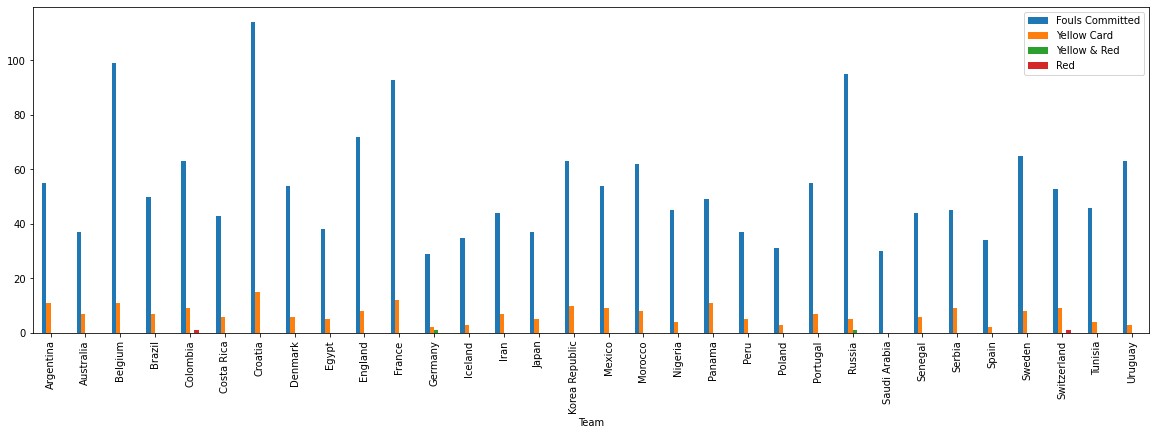

In [ ]:
df1=new_df[['Fouls Committed','Yellow Card','Yellow & Red','Red']]
plt.rcParams['figure.figsize']=[20,6]
k=df1.plot.bar()


It is clearly visible that more number of fouls were committed by Croatia. 
The bar graph clearly explains that there are very few red cards and few red and yellow cards.

Now let us also visualize the goals scored by the teams.

In [ ]:
g1=df.groupby('Team')
new_df=g1.sum()
new_df.columns


Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time', 'On target %'],
      dtype='object')

In [ ]:
new_df=new_df[['Goal Scored']]
new_df.reset_index(inplace=True)
new_df

,Team,Goal Scored
0,Argentina,6
1,Australia,2
2,Belgium,16
3,Brazil,8
4,Colombia,6
5,Costa Rica,2
6,Croatia,14
7,Denmark,3
8,Egypt,2
9,England,12


In [ ]:
(x,y)=new_df.shape
l=np.zeros(x,dtype=np.float64)
x1=new_df.index[new_df['Goal Scored']==new_df['Goal Scored'].max()]
l[x1]=0.5

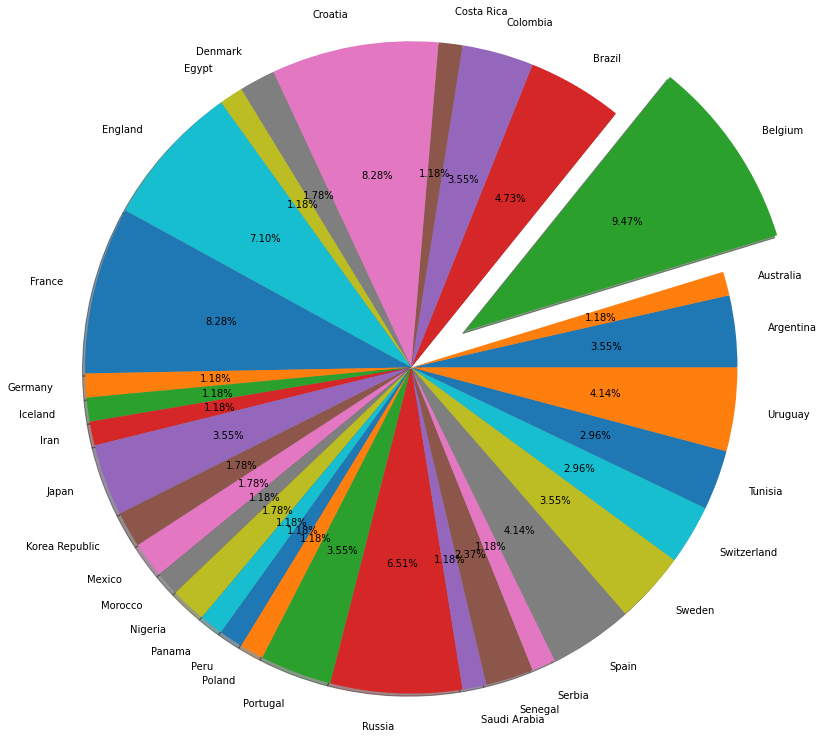

In [ ]:

plt.pie(new_df['Goal Scored'],labels=new_df['Team'],radius=2.5,autopct="%0.2f%%",shadow=True,explode=l)
plt.show()

In the pie chart we can see that Belgium has scored more number of goals in the complete tournament. 
And we can also see that other teams like Russia, England, Croatia and France also are having a good goal percentage. 